# 4. Linear Regression with One Regressor

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_excel("data/replication/Replication Data/caschool.xlsx")
df.head()

F:\miniconda3\envs\py\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [3]:
df['testscr'].mean()

np.float64(654.156548055013)

In [4]:
df['testscr'].std()

np.float64(19.053347643618785)

In [5]:
df['str'].mean()

np.float64(19.64042526199704)

In [6]:
df['str'].std()

np.float64(1.8918117872336757)

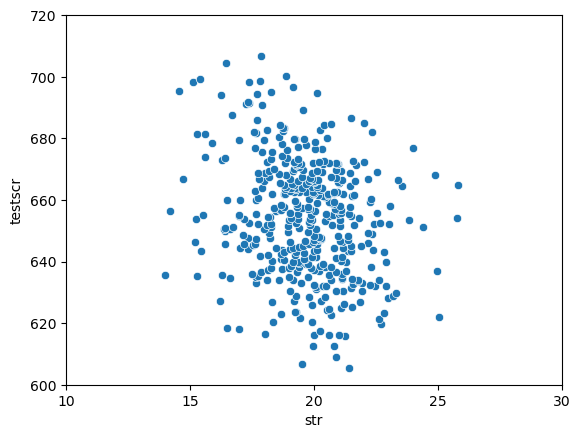

In [7]:
sns.scatterplot(x='str', y='testscr', data=df)
plt.xticks(range(10, 31, 5))
plt.yticks(range(600, 721, 20))
plt.show()

In [8]:
df['str'].corr(df['testscr'])

np.float64(-0.22636275108686532)

There is a weak negatice relationship between the two variables

$$
TestScore = \beta_o + \beta_1 \times STR
$$

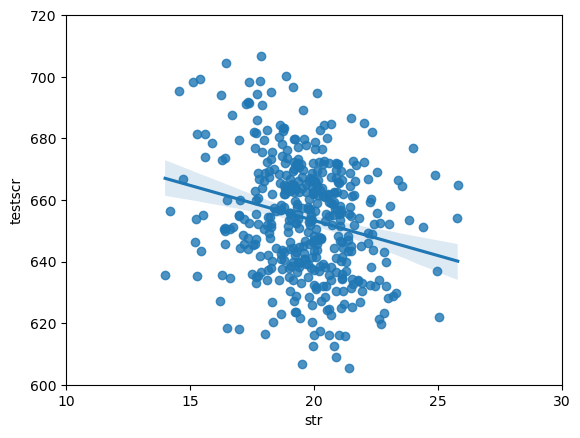

In [9]:
sns.regplot(x='str', y='testscr', data=df)
plt.xticks(range(10, 31, 5))
plt.yticks(range(600, 721, 20))
plt.show()

In [10]:
model = smf.ols('testscr ~ str', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.78e-06
Time:                        14:36:21   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.0

In [11]:
RSS = np.sum(model.resid**2)
RSS

np.float64(144315.4836027621)

In [12]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
str,1.0,7794.110041,7794.110041,22.575111,0.000003
Residual,418.0,144315.483603,345.252353,NaN,NaN


In [13]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [14]:
model.ssr

np.float64(144315.4836027621)

In [15]:
SER = math.sqrt(model.ssr/(model.nobs-2))
SER

18.58096749678702

In [16]:
str_value = 22
model.predict({'str': str_value})

0    648.77717
dtype: float64

Prediction of test score based on student-teacher-ratio = 22 is  
prediction $\pm $ SER  
= 649 $\pm$ 18.6

$R^2$
 of 0.051 means that the regressor STR explains 5.1% of the variance of
the dependent variable

 $SER$ of 18.6 means that there is a large spread of the
scatterplot  around the regression line as measured in points on the test.
This large spread means that predictions of test scores made using only the student–
teacher ratio for that district will often be wrong by a large amount.

## Empirical Exercises

In [17]:
df2 = pd.read_excel("data/exercises/Growth (EE 4.1, 5.2, 6.2)/Growth.xlsx")
df2.head()

F:\miniconda3\envs\py\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


In [18]:
df3 = pd.read_csv("data/exercises/Earnings_and_Height.csv")
df3.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1


In [19]:
df4 = pd.read_csv("data/additional/cps12.csv")
df4.head()

,year,ahe,bachelor,female,age
0,2012,19.230770,0,0,30
1,2012,17.548077,0,0,29
2,2012,8.547009,0,0,27
3,2012,16.826923,0,1,25
4,2012,16.346153,1,1,27


In [20]:
df5 = pd.read_excel("data/additional/TeachingRatings.xlsx")
df5.head()

,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.289916,4.3,0,0
1,0,59,0,0,-0.737732,4.5,0,0
2,0,51,0,0,-0.571984,3.7,0,0
3,0,40,1,0,-0.677963,4.3,0,0
4,0,31,1,0,1.509794,4.4,0,0


In [21]:
df6 = pd.read_excel("data/additional/CollegeDistance.xlsx")
df6.head()

,female,black,hispanic,bytest,dadcoll,momcoll,ownhome,urban,cue80,stwmfg80,dist,tuition,ed,incomehi
0,0,0,0,39.15,1,0,1,1,6.2,8.09,0.2,0.88915,12,1
1,1,0,0,48.87,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
2,0,0,0,48.74,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
3,0,1,0,40.40,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
4,1,0,0,40.48,0,0,0,1,5.6,8.09,0.4,0.88915,13,0
